In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [411]:
'''importing data'''
df = pd.read_csv("E:\ID5030\HW04\iris.data",header=None)
print('The shape of given data is:',df.shape)
df

The shape of given data is: (150, 5)


0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]

In [412]:
Y=df[4]
Y=pd.DataFrame(Y)
print(Y.shape)
Y


(150, 1)


4
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]

In [413]:
'''OUTPUT IN ONE HOT VECTOR FORM'''
Y = pd.get_dummies(Y)
Y

4_Iris-setosa  4_Iris-versicolor  4_Iris-virginica
0                1                  0                 0
1                1                  0                 0
2                1                  0                 0
3                1                  0                 0
4                1                  0                 0
..             ...                ...               ...
145              0                  0                 1
146              0                  0                 1
147              0                  0                 1
148              0                  0                 1
149              0                  0                 1

[150 rows x 3 columns]

In [414]:
df=np.array(df)
X=df[:,:4]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [415]:
'''splitting into train and test data'''
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.25,random_state=0)
print(f'Shape of train data is:{x_train.shape}')
print(f'Shape of train output data is:{y_train.shape}')
print(f'Shape of test data is:{x_test.shape}')
print(f'Shape of test output data is:{y_test.shape}')
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train=np.array(x_train)
x_test=np.array(x_test)
print(type(x_train))

Shape of train data is:(112, 4)
Shape of train output data is:(112, 3)
Shape of test data is:(38, 4)
Shape of test output data is:(38, 3)
<class 'numpy.ndarray'>


In [416]:
def relu(z):
    return np.maximum(0,z)

In [417]:
def derivative_relu(z):
    return np.array(z>0,dtype=np.float32)

In [418]:
def softmax(z):
    exp_x=np.exp(z.astype("float"))
    return exp_x/np.sum(exp_x,axis=0)

In [419]:
def forward_propogation(w1,b1,w2,b2,x):
    z1=np.dot(w1,x)+b1
    a1=relu(z1)
    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)
    return a1,a2

In [420]:
def cross_entropy(a2,y):
    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(a2))
    return cost

In [421]:
def back_propogation(a1,a2,w1,w2,b1,b2,x,y):
        m=x.shape[1]
        dz2=a2-y
        dw2=(1/m)*np.dot(dz2,a1.T)
        db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
        dz1=(1/m)*np.dot(w2.T,dz2)*derivative_relu(a1)
        dw1=(1/m)*np.dot(dz1,x.T)
        db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
        return dw1,db1,dw2,db2

In [422]:
def gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2,learning_rate):
    alpha = learning_rate
    w1=w1-alpha*dw1
    w2=w2-alpha*dw2
    b1=b1-alpha*db1
    b2=b2-alpha*db2
    return w1,w2,b1,b2
    

In [423]:
'''Initialising parameters of different layers'''
x_train=x_train.T
x_test=x_test.T
y_test=y_test.T
y_train=y_train.T
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4, 112)
(3, 112)
(4, 38)
(3, 38)


epoch:  0 error value: 19.352259783573434
epoch:  1000 error value: 0.20790702246156423
epoch:  2000 error value: 0.12825717435646347
epoch:  3000 error value: 0.09624922540533133
epoch:  4000 error value: 0.07924063147340832
epoch:  5000 error value: 0.06844065640433719
epoch:  6000 error value: 0.06090426842781564
epoch:  7000 error value: 0.05534594764267432
epoch:  8000 error value: 0.051077453387363726
epoch:  9000 error value: 0.04770209821450805
Predicted data is :  [1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 2 1 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2
 0]
Ground truth data is : [1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]
Accuracy of Train data is :  98.214285714

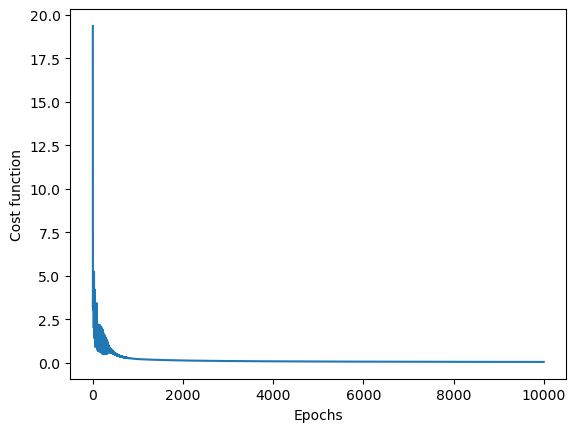

In [426]:
'''Iterating the model for specified number for epochs'''
w1=np.random.randn(4,4)
b1=np.zeros((4,1))
w2=np.random.randn(3,4)
b2=np.zeros((3,1))
J=[]
iterations=10000
learning_rate=0.1
for i in range(iterations):
    a1,a2=forward_propogation(w1,b1,w2,b2,x_train)
    dw1,db1,dw2,db2=back_propogation(a1,a2,w1,w2,b1,b2,x_train,y_train)
    w1,w2,b1,b2=gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2,learning_rate)
    cost=cross_entropy(a2,y_train)
    J.append(cost)
    if i%(iterations/10)==0:
        print('epoch: ',i,'error value:',J[-1])
a2_final=np.argmax(a2,0)
y_train_final=np.argmax(y_train,0)   
acc=np.mean(a2_final==y_train_final)*100
print('Predicted data is : ',a2_final)
print('Ground truth data is :',y_train_final)
print('Accuracy of Train data is : ',acc)
plt.plot(J)
plt.xlabel('Epochs')
plt.ylabel('Cost function')
plt.show()

In [427]:
'''Accuracy of test data'''
a1_test,a2_test=forward_propogation(w1,b1,w2,b2,x_test)
print(a2_test.shape)
cost=cross_entropy(a2_test,y_test)
a2_final_test=np.argmax(a2_test,0)
y_test_final=np.argmax(y_test,0)   
acc=np.mean(a2_final_test==y_test_final)*100
print(f'The test data true values in numerical form : {y_test_final}')
print(f'The test data predicted values in numerical form : {a2_final_test}')
print('Error in test data is',cost)
print('Accuracy of Test data is : ',acc)

(3, 38)
The test data true values in numerical form : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
The test data predicted values in numerical form : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 2 0 2 2 1 0
 2]
Error in test data is 0.15813570181341727
Accuracy of Test data is :  94.73684210526315


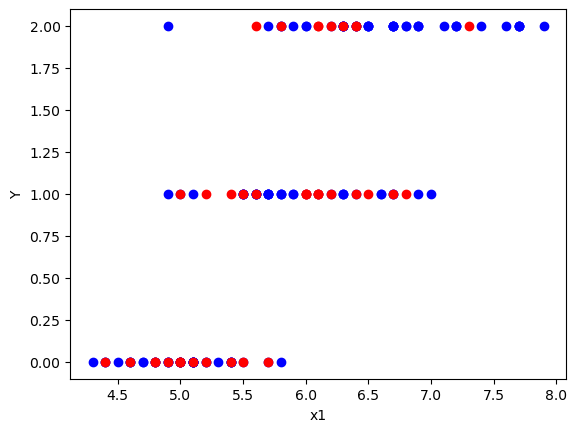

In [428]:
'''Plotting distribution of train and test data'''
plt.scatter(x_train[0,:],y_train_final,color='blue')
plt.scatter(x_test[0,:],y_test_final,color='red')
plt.xlabel('x1')
plt.ylabel('Y')
plt.show()

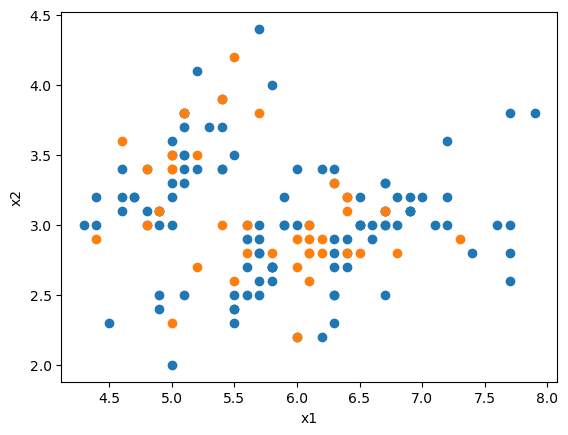

In [429]:
plt.scatter(x_train[0,:],x_train[1,:])
plt.scatter(x_test[0,:],x_test[1,:])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

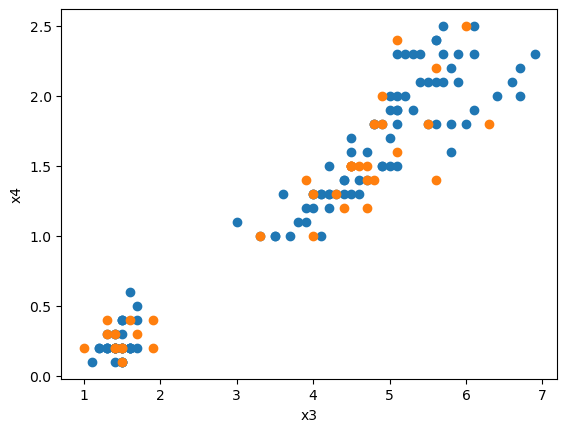

In [430]:
plt.scatter(x_train[2,:],x_train[3,:])
plt.scatter(x_test[2,:],x_test[3,:])
plt.xlabel('x3')
plt.ylabel('x4')
plt.show()

The test data true values in numerical form : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
The test data predicted values in numerical form : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 2 0 2 2 1 0
 2]


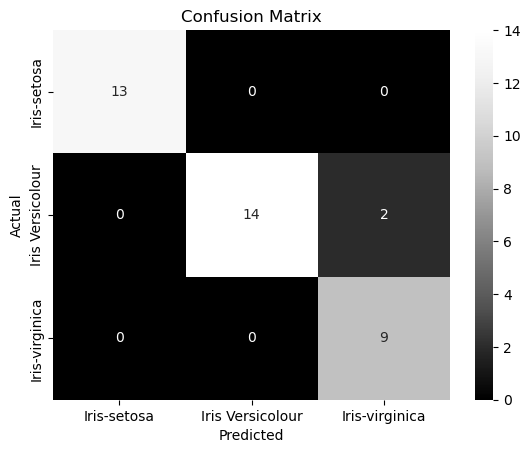

In [437]:
'''CONFUSION MATRIX'''
print(f'The test data true values in numerical form : {y_test_final}')
print(f'The test data predicted values in numerical form : {a2_final_test}')
conf_mat = confusion_matrix(y_test_final, a2_final_test)
sns.heatmap(conf_mat, annot=True, cmap='Greys_r', fmt='g', xticklabels=['Iris-setosa', 'Iris Versicolour', 'Iris-virginica'], 
            yticklabels=['Iris-setosa', 'Iris Versicolour', 'Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# INFERENCES

The train data accuracy was found to be 98.214 and that of test data was 94.736. Out of 36 data points in test data 36 were classified correctly and 2 were mis-classified. 2 Iris versicolour were predicted as Iris virginica.